<a href="https://colab.research.google.com/github/SangHee33/SangHee1/blob/main/14%EC%B0%A8_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p. 290 ~ 319 (303~310 제외)

#01 회귀 소개

- 독립변수 1개: 단일 회귀, 선형 회귀
- 독립변수 여러 개: 다중 회귀, 비선형 회귀

#02 단순 선형 회귀를 통한 회귀 이해

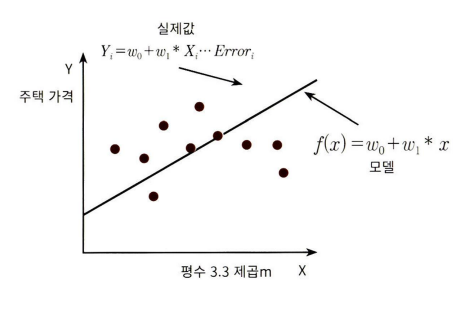
>
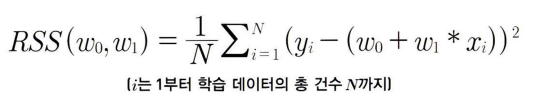

- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델 = 전체 데이터의 잔차 합이 최소가 되는 모델
- RSS : 오류 값의 제곱을 구해서 더하는 방식
- ERROR^2 = RSS

#03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

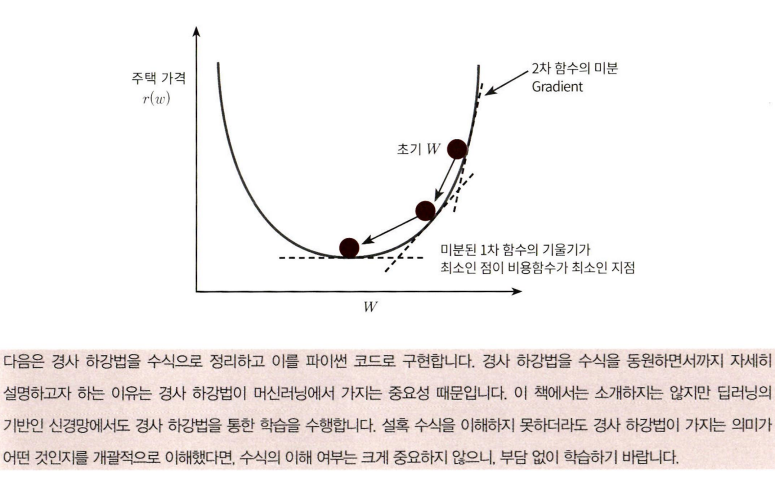

>
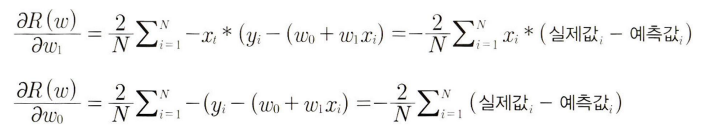

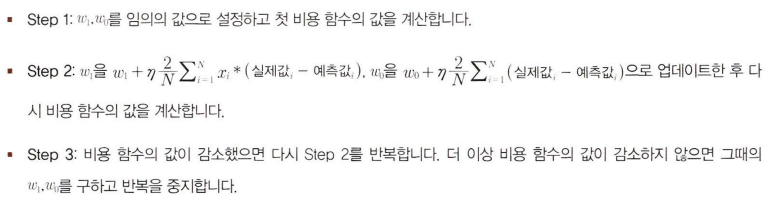

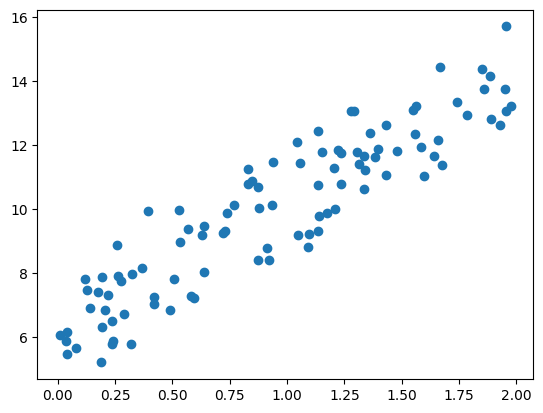

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, x0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 *X + np.random.randn(100,1)

# X, y 이터 세트 산점도로 시각화
plt.scatter(X,y)

In [2]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [3]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0, X,y, learning_rate=0.01):
  N=len(y)
  # 먼저 w1_update, w2_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X, w1.T)+w0
  diff = y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1과 w0를 업데이트 할 w1_update, w2_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y, y_pred):
  N= len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


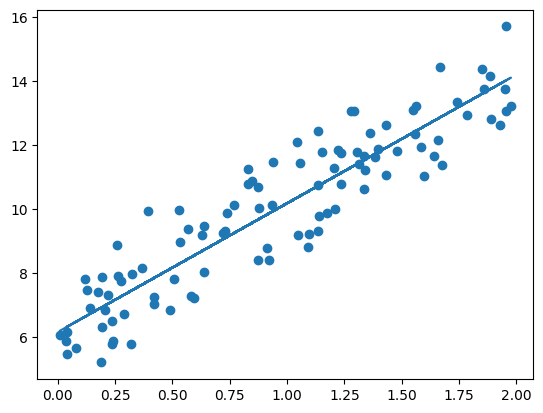

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도
- 대용량 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출

In [7]:
# 미니 배치 확률적 경사 하강법
def stochastic_gradient_descent_steps(X,y, batch_size=10, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1:",round(w1[0,0],3), "w0",round(w0[0,0],3))
y_pred = w1[0,0] * X +w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0 6.156
Stochastic Gradient Descent Total Cost:0.9937


미니 배치 확률적 경사 하강법과 경사 하강법의 w1, w0에 큰 차이가 없으며 예측 오류 비용 또한 큰 예측 성능상 차이가 없다.


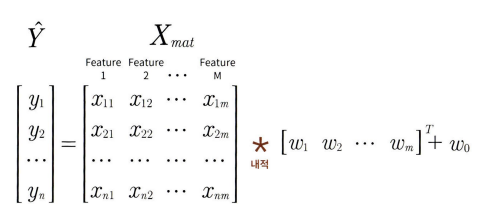
>
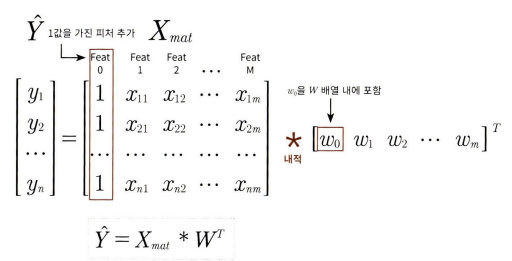

#05 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해
다항 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
다항 회귀는 선형 회귀

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 mtx 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식의 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 polynomialfeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식의 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
def polynomial_func(X):
  y = 1+2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [12]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('삼차 다항식 계수 feature :\n',poly_ftr)

# Linear Regression에 3차 다항식 계수 피처와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수:\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape:', np.round(model.coef_.shape))

삼차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: [10]


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

# Pipeline 객체로 streamline하게 Polynomial 피처 변환과 linear regression 을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y =  polynomial_func(X)
model = model.fit(X,y)

print('Polynomial 회귀 계수:\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y는 코사인 기반의 true_fun()에서 약간의 노이즈 변동값을 더함
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


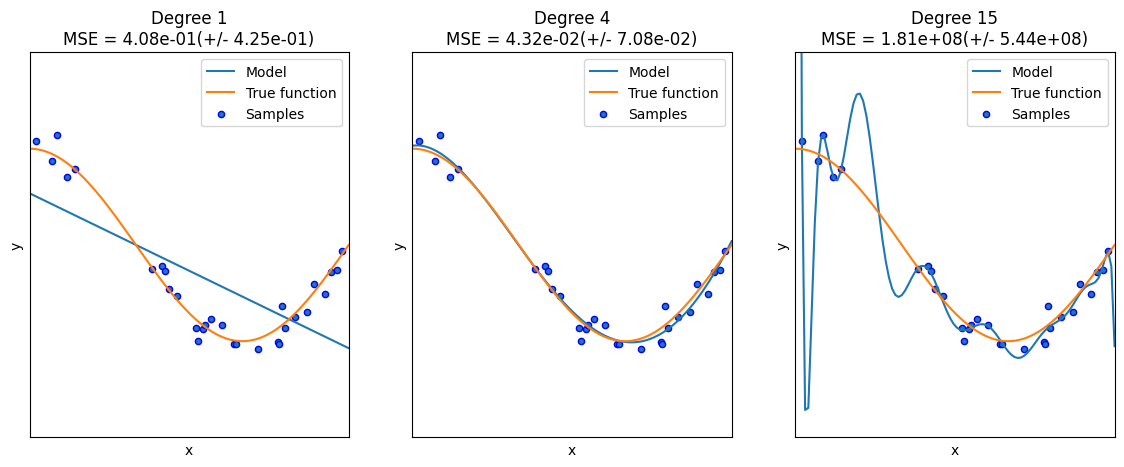

In [17]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
     ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    # pipeline을 구성하는 세부 객체를 접근하는 named_steps를 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i],-1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.    
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-',label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

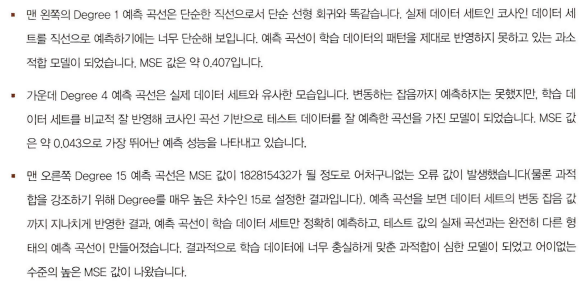

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- Degree 1과 같은 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 고편향성
- Degree 15와 같은 모델은 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성을 가진 고분산성
- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아짐
>
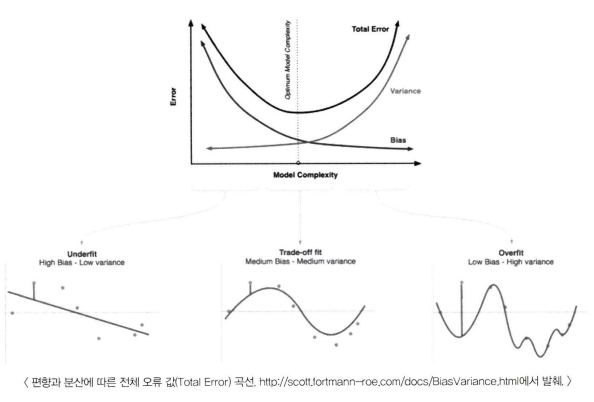